# 因子分析

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 统计数据可视化
from scipy import stats
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer, calculate_kmo,calculate_bartlett_sphericity
# 绘图风格： style= ["darkgrid"，"whitegrid"，"dark"，"white"，"ticks"]，默认darkgrid
sns.set_style(style="darkgrid")
# 颜色风格： themes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
sns.set_palette(palette='bright')
ChinaFonts = {"黑体": "simhei", "宋体": "simsun", "华文楷体": "STKAITI"}
plt.rcParams["font.sans-serif"] = ChinaFonts["黑体"]  # 解决中文乱码问题
plt.rcParams["axes.unicode_minus"] = False  # 解决负号无法正常显示的问题
path_data = "/home/carton/workspace/python/Multivariate-statistical-analysis/database/第四章数据/"  # 设置 数据路径
path_pic = "/home/carton/workspace/python/Multivariate-statistical-analysis/save-database/第四章数据/"  # 设置 图像保存路径


## 读取数据

In [32]:
file_match = path_data + "火柴销售量影响因素.xlsx" # 指定 路径 + 文件名
df_data = pd.read_excel(file_match, index_col=0) # 读取数据，之后还需整理
df_data.head(3)

,煤气液化气,卷烟,蚊香,打火石
编号,,,,
1,11.11,14.34,5.10,20.41
2,13.63,17.15,4.90,26.94
3,16.99,17.45,5.06,25.75


## 探索性数据分析
粗略做的话就不用了


可以看出数据在数量级上的差异程度，例如极大、极小值以及分布情况，用于判断是否需要做预处理

In [33]:
stats_dic = { "mean": "均值", "std": "标准差", "max": "极大值", "min": "极小值","skew":"偏度", "kurt":"峰度"}
df_data_stats = df_data.apply(stats_dic.keys())
df_data_stats = df_data_stats.rename(index=stats_dic) # 采用字典将指标替换为中文
df_data_stats.T.round(2)

,均值,标准差,极大值,极小值,偏度,峰度
煤气液化气,38.81,20.66,76.68,11.11,0.62,-0.87
卷烟,33.86,15.16,55.36,14.34,0.22,-1.82
蚊香,18.99,12.75,48.49,4.90,0.77,-0.18
打火石,17.04,9.09,30.18,2.43,-0.23,-1.39


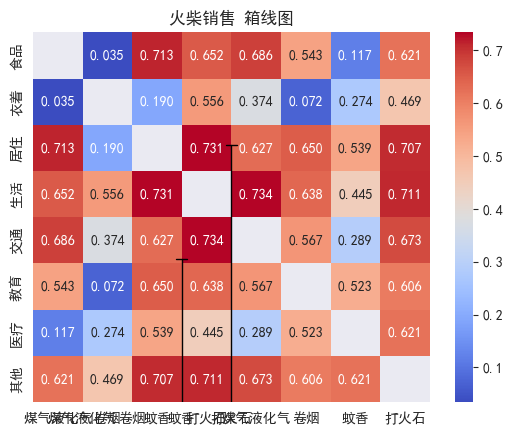

In [34]:
df_data.boxplot(grid=False)
plt.title("火柴销售 箱线图")
plt.show()

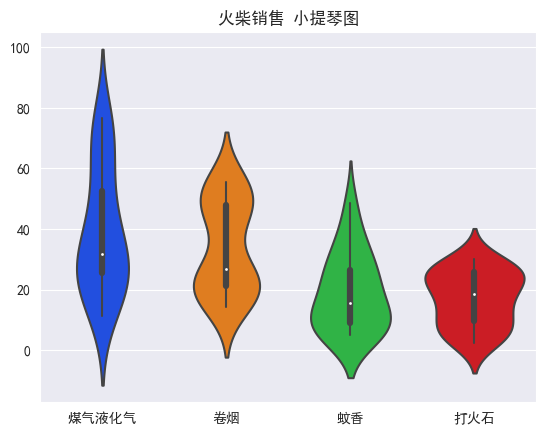

In [35]:
my_pal = {'煤气液化气':"red", '卷烟':"pink", '蚊香':"blue", '打火石':"cyan"}
sns.violinplot(data=df_data, orient="v", palette="bright")
plt.title("火柴销售 小提琴图")
plt.show()

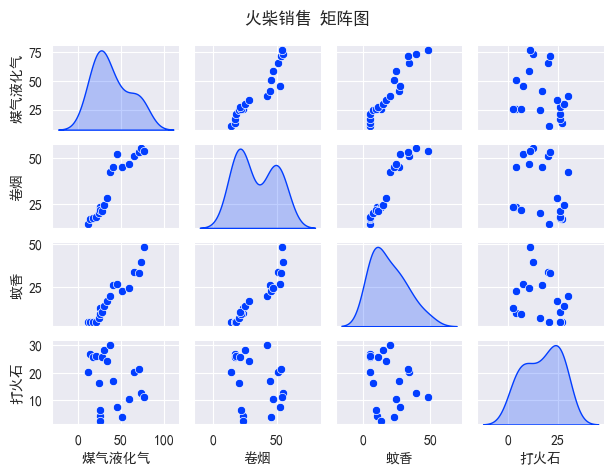

In [36]:
sns.pairplot(df_data, height=1.2, aspect=1.3,diag_kind="kde")
plt.suptitle("火柴销售 矩阵图")
plt.tight_layout()
plt.show()

In [37]:
sns.heatmap(df_data.corr(), annot=True, fmt=".3f", cmap="coolwarm", mask=(df_data.corr()==1), annot_kws={"size":14, "weight": "light"})

<AxesSubplot: >

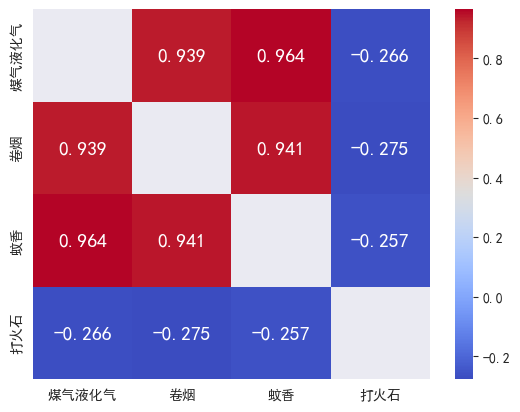

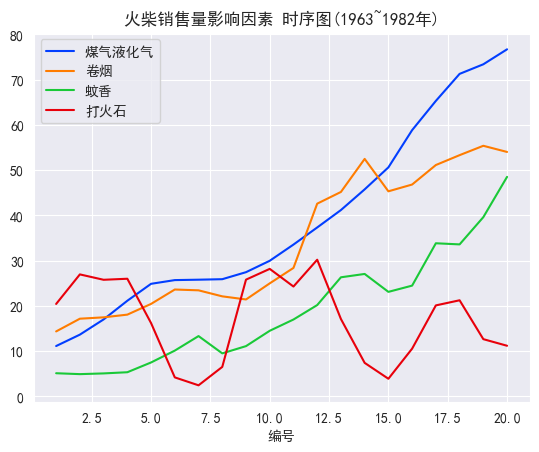

In [38]:
df_data.plot()
plt.title("火柴销售量影响因素 时序图(1963~1982年)")
plt.show()

## 适用性检验
因子分析的前提是变量之间具有相关性，因此在进行因子分析之前，
需要先进行适用性检测，即检验变量之间的相关性，检验相关阵是否为单位
矩阵，也就是检验各个变量是否各自独立。

(1) Bartlett's球状检验
检验变量的相关矩阵是否为单位阵，即检验各个变量是否各自独立。
若不是单位矩阵，**p值小于0.05**，说明原变量间存在相关性，可进行因
子分析；反之，变量之间不存在相关性，数据不适合进行主成分分析。

(2) KMO检验
检查变量间的相关性和偏相关性，取值在0-1之间；KOM统计量越接
近1，变量间的相关性越强，偏相关性越弱，因子分析的效果越好。
**通常取值大于0.6可以开始进行因子分析**

In [39]:
test_kmo = calculate_kmo(df_data)
test_bartlett = calculate_bartlett_sphericity(df_data)
if test_kmo[1] >= 0.7 and test_bartlett[1] <= 0.05:
    print("因子分析适用性检验通过")
else:
    print("因子分析适用性检验 未 通过")
print("kmo:{}, barlett:{}".format(test_kmo[1], test_bartlett[1]))

因子分析适用性检验通过
kmo:0.7918995748894967, barlett:3.755340057252054e-16


## 提取因子
(1) 计算原始特征值、特征向量(因子载荷)，计算方差贡献率和累计贡献率

In [40]:
factor1 = FactorAnalyzer(n_factors=4, rotation=None, method="principal")
factor1.fit(df_data)
col_name = ["因子"+str(i) for i in range(1,factor1.n_factors+1)] 
df_res = pd.DataFrame(factor1.loadings_, columns=col_name, 
index=df_data.columns[0:]) # 先转置，列为 特征名称, 行为变量名
f_contribution_var = factor1.get_factor_variance()
df_res.loc["特征值",:] = f_contribution_var[0]
df_res.loc["贡献率",:] = f_contribution_var[1]
df_res.loc["累计贡献率",:] = f_contribution_var[2]
df_res.round(4)

,因子1,因子2,因子3,因子4
煤气液化气,0.9773,0.1238,-0.1116,0.1311
卷烟,0.9707,0.1096,0.2139,0.0053
蚊香,0.9766,0.1339,-0.0993,-0.1359
打火石,-0.3888,0.9213,0.0040,0.0015
特征值,3.0022,0.8941,0.0681,0.0357
贡献率,0.7505,0.2235,0.0170,0.0089
累计贡献率,0.7505,0.9741,0.9911,1.0000


(2) 碎石图 + 累计贡献率图

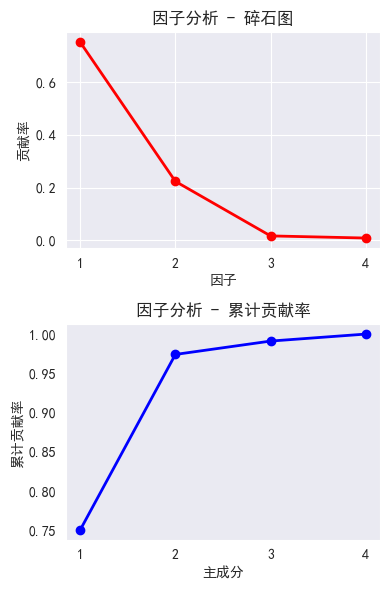

In [41]:
FA_values = np.arange(factor1.n_factors)+1 # 主成分顺序
fig, axes = plt.subplots(2,1, figsize=(4,6))
axes[0].plot(FA_values, df_res.loc["贡献率",:], 'ro-', linewidth=2)
axes[0].set_xticks(FA_values)
axes[0].set_title('因子分析 - 碎石图')
axes[0].set_xlabel('因子'); axes[0].set_ylabel('贡献率')
axes[1].plot(FA_values, df_res.loc["累计贡献率",:], 
'bo-', linewidth=2)
axes[1].set_xticks(FA_values)
axes[1].set_title('因子分析 - 累计贡献率')
axes[1].set_xlabel('主成分'); axes[1].set_ylabel('累计贡献率')
plt.grid() # 添加网格
plt.tight_layout() # 调整多图间距，避免重叠
plt.show()

 （3）因子成分含义分析
 
 - 根据因子载荷矩阵，用前两个主因子对应的特征向量作为坐标值，绘制原始指标的散点图
 
 - 同时根据因子载荷矩阵绘制因子与原始指标之间的热力图，结果如下

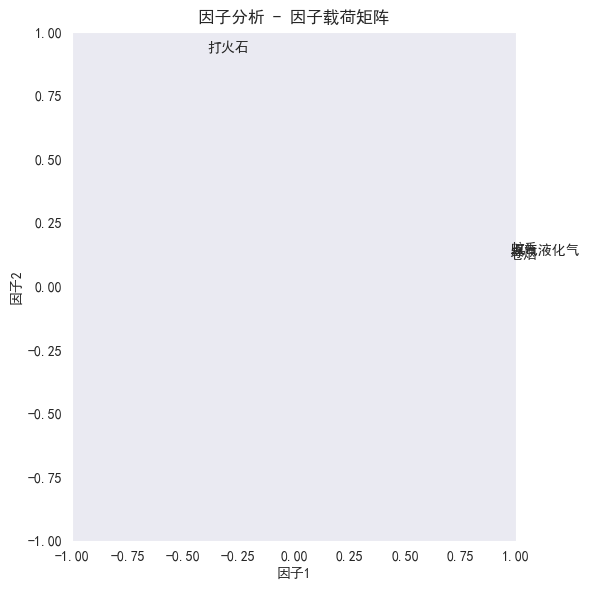

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_title('因子分析 - 因子载荷矩阵')
ax.set_xlabel('因子1')
ax.set_ylabel('因子2')
for i in range(df_data.shape[1]):
    ax.annotate(df_data.columns[i], (df_res.iloc[i, 0], df_res.iloc[i, 1]))
plt.grid()  # 添加网格
plt.tight_layout()  # 调整多图间距，避免重叠
plt.show()

## 旋转

In [43]:
factor = FactorAnalyzer(n_factors=4, rotation="promax", method="principal")
factor.fit(df_data)
col_name = ["因子"+str(i) for i in range(1,factor.n_factors+1)] 
df_res = pd.DataFrame(factor.loadings_, columns=col_name, index=df_data.columns[0:]) # 先转置，列为 特征名称, 行为变量名
f_contribution_var = factor.get_factor_variance()
df_res.loc["特征值",:] = f_contribution_var[0]
df_res.loc["贡献率",:] = f_contribution_var[1]
df_res.loc["累计贡献率",:] = f_contribution_var[2]
df_res.round(4)

,因子1,因子2,因子3,因子4
煤气液化气,0.9887,-0.0000,-0.0026,0.1462
卷烟,0.9146,-0.0000,0.3167,-0.0000
蚊香,0.9936,-0.0000,-0.0023,-0.1212
打火石,-0.0035,0.9991,-0.0000,-0.0000
特征值,2.8012,0.9982,0.1003,0.0361
贡献率,0.7003,0.2495,0.0251,0.0090
累计贡献率,0.7003,0.9499,0.9749,0.9840


## 计算因子得分

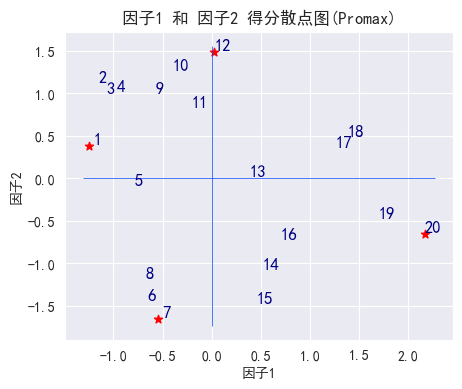

In [44]:
col_name = ["因子"+str(i) for i in range(1,factor.n_factors+1)] # 自动生成 特征名称
df_pc = pd.DataFrame(data=factor.transform(df_data), columns=col_name) 
# 因子得分值, 不用再拟合
df_pc = df_pc.set_index(df_data.index).copy() # 重设序号，以原始数据序号为准
plt.subplots(figsize=(5,4)) # 绘制 因子得分值图 —— 分析内涵
p_x=np.array(df_pc.iloc[:,0]) # 避免引用时，受原始索引号影响
p_y=np.array(df_pc.iloc[:,1])
R_x = np.max(p_x)-np.min(p_x) # range of p_x
R_y = np.max(p_y)-np.min(p_y) # range of p_y
# 标记特殊点
max_x = p_x.max(); max_x_id = list(p_x).index(max_x) 
# 等价 max_x_id = np.argmax(p_x) #最大值索引
min_x = p_x.min(); min_x_id = list(p_x).index(min_x)
max_y = p_y.max(); max_y_id = list(p_y).index(max_y)
min_y = p_y.min(); min_y_id = list(p_y).index(min_y)
minmax_list = [min_x_id, max_x_id, min_y_id, max_y_id]
plt.scatter(p_x[minmax_list], p_y[minmax_list], marker= "*" , c='r') 
# 序列的索引与列表索引可能不一样，需对应
d_pian = 0.05 # 标注文字时做一定偏移，避免覆盖散点
for i in range(len(df_pc)): # 索引序号可能需要进行修改
    plt.text(p_x[i] + R_x*d_pian/2, p_y[i]+ R_y*d_pian/2, df_pc.index[i], color='navy',ha='center', va='center',fontsize=12)
plt.xlabel("因子{}".format(1))
plt.ylabel("因子{}".format(2))
plt.hlines(0,np.min(p_x)*(1+d_pian),np.max(p_x)*(1+d_pian), linewidth=0.5)
plt.vlines(0,np.min(p_y)*(1+d_pian),np.max(p_y)*(1+d_pian), linewidth=0.5)
plt.title("因子{} 和 因子{} 得分散点图(Promax)".format(1,2))
plt.show()


## 实验2

In [45]:
file_match2 = path_data + "2020年全国分地区城镇居民人均消费支出构成.xlsx" # 指定 路径 + 文件名
df_data2 = pd.read_excel(file_match2, index_col=0) # 读取数据，之后还需整理
df_data2

,食品,衣着,居住,生活,交通,教育,医疗,其他
地区,,,,,,,,
北京,8751.4,1924.0,17163.1,2306.7,3925.2,3020.7,3755.0,880.0
天津,9122.2,1860.4,7770.0,1804.1,4045.7,2530.6,2811.0,950.7
河北,6234.6,1667.4,5996.0,1540.6,2798.3,2412.2,1988.8,529.6
山西,5304.4,1671.0,4452.3,1149.4,2687.2,2150.2,2421.2,496.3
内蒙古,6690.6,2123.5,5149.3,1472.9,3724.4,2099.5,2039.8,587.7
辽宁,7334.0,1717.8,5503.6,1372.7,3016.5,2371.4,2595.2,937.9
吉林,6040.8,1749.7,4597.2,1236.5,2770.2,2187.7,2396.4,644.7
黑龙江,6029.5,1615.0,4449.4,1142.1,2436.1,1891.1,2350.7,483.6
上海,11515.1,1763.5,16465.1,2177.5,4677.1,3962.6,3188.7,1089.9


In [46]:
stats_dic2 = { "mean": "均值", "std": "标准差", "max": "极大值", "min": "极小值","skew":"偏度", "kurt":"峰度"}
df_data2_stats = df_data2.apply(stats_dic2.keys())
df_data2_stats = df_data2_stats.rename(index=stats_dic2) # 采用字典将指标替换为中文
df_data2_stats.T.round(2)

,均值,标准差,极大值,极小值,偏度,峰度
食品,7634.02,1519.59,11515.1,5304.4,0.79,0.19
衣着,1665.09,306.61,2303.1,874.1,-0.71,1.45
居住,6546.41,3218.82,17163.1,3929.1,2.36,5.43
生活,1576.16,321.57,2306.7,1140.0,0.64,-0.37
交通,3394.89,693.04,4987.6,2391.8,0.53,-0.51
教育,2427.60,558.90,3962.6,1015.1,0.57,1.82
医疗,2206.79,498.18,3755.0,1098.9,0.83,2.49
其他,629.80,174.63,1089.9,376.2,0.91,0.54


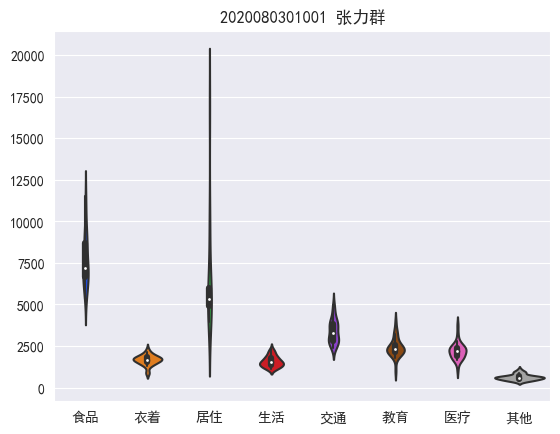

In [47]:
my_pal = {'食品':"red", '衣着':"pink", '居住':"blue", '生活':"cyan", "交通":"black", "教育":"green", "医疗":"red", "其他":"pink"}
sns.violinplot(data=df_data2, orient="v", palette="bright")
plt.title("2020080301001 张力群")
plt.show()

In [48]:
sns.heatmap(df_data2.corr(), annot=True, fmt=".3f", cmap="coolwarm", mask=(df_data2.corr()==1), annot_kws={"size":10, "weight": "light"})

<AxesSubplot: >

In [49]:
factor2 = FactorAnalyzer(n_factors=4, rotation=None, method="principal")
factor2.fit(df_data2)
col_name = ["因子"+str(i) for i in range(1,factor2.n_factors+1)] 
df_res2 = pd.DataFrame(factor2.loadings_, columns=col_name, index=df_data2.columns[0:]) # 先转置，列为 特征名称, 行为变量名
f_contribution_var = factor2.get_factor_variance()
df_res2.loc["特征值",:] = f_contribution_var[0]
df_res2.loc["贡献率",:] = f_contribution_var[1]
df_res2.loc["累计贡献率",:] = f_contribution_var[2]
df_res2

,因子1,因子2,因子3,因子4
食品,0.753880,-0.505272,-0.293329,-0.187108
衣着,0.436492,0.806316,-0.357313,0.038814
居住,0.867052,-0.196653,0.126247,-0.244760
生活,0.898244,0.126136,-0.194135,0.117455
交通,0.824972,-0.079892,-0.326410,0.148019
教育,0.773062,-0.242569,0.317253,0.456098
医疗,0.605161,0.339555,0.679540,-0.104649
其他,0.886801,0.151235,0.061805,-0.203590
特征值,4.748322,1.163419,0.940129,0.392554
贡献率,0.593540,0.145427,0.117516,0.049069
